# Image Segmentation

This is used to reduce the number of pixels in an image. The pixels are grouped
to meaningful regions based upon hue. This can lead to computational
efficiencies when passing to ML algorithms. These regions are then referred to
as superpixels.

Below, we use Simple Linear Iterative Clustering (SLIC).

In [46]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries # plotting superpixels
from skimage import data
import matplotlib.pyplot as plt
import numpy as np # counting superpixels

SLIC number of segments: 185


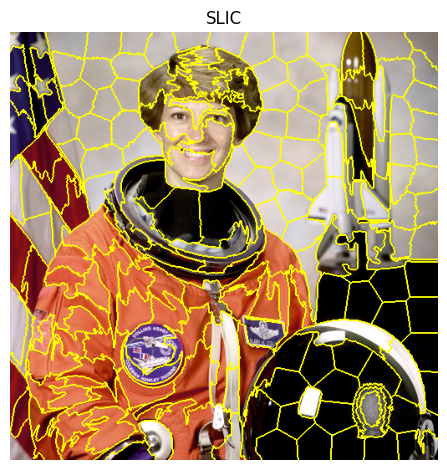

In [45]:
astro = data.astronaut()
segments_slic = slic(astro, n_segments=250,  start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
plt.imshow(mark_boundaries(astro, segments_slic))
plt.title("SLIC")
plt.axis("off")
plt.tight_layout()
plt.show()